In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stocks = pd.read_csv('Nifty_f_w_cols.csv')
bench_mark = pd.read_csv('bench_mark.csv')


In [3]:
stocks

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
0,2017-01-02,NaN,NaN,NaN,NaN,85.4063,85.3459,12.1412,12.0141,NaN,...,54.4158,51.8404,16.5819,16.5676,16.1616,16.1616,28.4434,55.8768,55.5247,28.2664
1,2017-01-03,NaN,NaN,NaN,NaN,87.6502,87.5681,12.4602,12.3270,NaN,...,55.8757,53.2061,17.1568,16.9522,16.5305,16.5305,29.2112,57.3851,57.0192,29.0272
2,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-06,NaN,NaN,NaN,NaN,94.2218,94.0623,12.4805,12.3277,NaN,...,60.1505,57.1844,18.4171,18.1976,17.7224,17.7224,31.4254,61.7349,61.3258,31.2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2022-12-27,11.7272,11.7271,11.6101,11.6101,182.9798,180.3561,18.9172,18.4309,10.6286,...,119.4942,111.1039,36.5966,34.2500,34.6187,22.0658,62.0657,123.1915,121.8570,61.3914
2165,2022-12-28,11.7252,11.7250,11.6079,11.6079,182.8785,180.2549,18.9067,18.4205,10.6225,...,119.4297,111.0428,36.5765,34.2312,34.5990,22.0532,62.0318,123.1243,121.7901,61.3577
2166,2022-12-29,11.7583,11.7581,11.6404,11.6404,183.5661,180.9313,18.9778,18.4896,10.6625,...,119.8791,111.4595,36.7137,34.3596,34.7283,22.1356,62.2653,123.5879,122.2483,61.5885
2167,2022-12-30,11.7293,11.7292,11.6115,11.6115,182.6990,180.0751,18.8881,18.4021,10.6128,...,119.3223,110.9407,36.5429,34.1998,34.5661,22.0323,61.9714,123.0044,121.6709,61.2976


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index_col                            2169 non-null   object 
 1   Aditya Birla Sun Life Mutual Fund    387 non-null    float64
 2   Aditya Birla Sun Life Mutual Fund.1  387 non-null    float64
 3   Aditya Birla Sun Life Mutual Fund.2  387 non-null    float64
 4   Aditya Birla Sun Life Mutual Fund.3  387 non-null    float64
 5   Aditya Birla Sun Life Mutual Fund.4  1479 non-null   float64
 6   Aditya Birla Sun Life Mutual Fund.5  1479 non-null   float64
 7   Aditya Birla Sun Life Mutual Fund.6  1479 non-null   float64
 8   Aditya Birla Sun Life Mutual Fund.7  1479 non-null   float64
 9   Axis Mutual Fund                     265 non-null    float64
 10  Axis Mutual Fund.1                   265 non-null    float64
 11  Axis Mutual Fund.2            

In [5]:
bench_mark

,Date,Close
0,2017-11-01,10440.50
1,2017-11-02,10423.80
2,2017-11-03,10452.50
3,2017-11-06,10451.80
4,2017-11-07,10350.15
...,...,...
3626,2022-12-23,17806.80
3627,2022-12-26,18014.60
3628,2022-12-27,18132.30
3629,2022-12-28,18122.50


In [7]:
bench_mark['Date'] = pd.to_datetime(bench_mark['Date'])
bench_mark.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

* filtering out the data which is not required

In [8]:
bench_mark = bench_mark[bench_mark['Date']>'2022-06-30']

* the benchmark data has lot duolicates because it is tracking every hour navs of the nifty 50 but we need the closing price at the end of the day so we drop the duplicates

In [9]:
bench_mark = bench_mark.drop_duplicates()

In [11]:
bench_mark #here

,Date,Close
3305,2022-07-01,15752.05
3306,2022-07-04,15835.35
3307,2022-07-05,15810.85
3308,2022-07-06,15989.80
3309,2022-07-07,16132.90
...,...,...
3626,2022-12-23,17806.80
3627,2022-12-26,18014.60
3628,2022-12-27,18132.30
3629,2022-12-28,18122.50


In [12]:
stocks.isna().sum()

index_col                                 0
Aditya Birla Sun Life Mutual Fund      1782
Aditya Birla Sun Life Mutual Fund.1    1782
Aditya Birla Sun Life Mutual Fund.2    1782
Aditya Birla Sun Life Mutual Fund.3    1782
                                       ... 
Taurus Mutual Fund.3                    687
UTI Mutual Fund                         689
UTI Mutual Fund.1                       689
UTI Mutual Fund.2                       689
UTI Mutual Fund.3                       689
Length: 65, dtype: int64

* these analysis makes us clear that stocks which are NaN in 2017 have not started in 2017 so no point considering hence dropping them would be a better idea

In [14]:
stocks

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
0,2017-01-02,NaN,NaN,NaN,NaN,85.4063,85.3459,12.1412,12.0141,NaN,...,54.4158,51.8404,16.5819,16.5676,16.1616,16.1616,28.4434,55.8768,55.5247,28.2664
1,2017-01-03,NaN,NaN,NaN,NaN,87.6502,87.5681,12.4602,12.3270,NaN,...,55.8757,53.2061,17.1568,16.9522,16.5305,16.5305,29.2112,57.3851,57.0192,29.0272
2,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-06,NaN,NaN,NaN,NaN,94.2218,94.0623,12.4805,12.3277,NaN,...,60.1505,57.1844,18.4171,18.1976,17.7224,17.7224,31.4254,61.7349,61.3258,31.2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2022-12-27,11.7272,11.7271,11.6101,11.6101,182.9798,180.3561,18.9172,18.4309,10.6286,...,119.4942,111.1039,36.5966,34.2500,34.6187,22.0658,62.0657,123.1915,121.8570,61.3914
2165,2022-12-28,11.7252,11.7250,11.6079,11.6079,182.8785,180.2549,18.9067,18.4205,10.6225,...,119.4297,111.0428,36.5765,34.2312,34.5990,22.0532,62.0318,123.1243,121.7901,61.3577
2166,2022-12-29,11.7583,11.7581,11.6404,11.6404,183.5661,180.9313,18.9778,18.4896,10.6625,...,119.8791,111.4595,36.7137,34.3596,34.7283,22.1356,62.2653,123.5879,122.2483,61.5885
2167,2022-12-30,11.7293,11.7292,11.6115,11.6115,182.6990,180.0751,18.8881,18.4021,10.6128,...,119.3223,110.9407,36.5429,34.1998,34.5661,22.0323,61.9714,123.0044,121.6709,61.2976


In [15]:
stocks = stocks.ffill(axis=0)

In [16]:
stocks.iloc[0:1,:]

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
0,2017-01-02,NaN,NaN,NaN,NaN,85.4063,85.3459,12.1412,12.0141,NaN,...,54.4158,51.8404,16.5819,16.5676,16.1616,16.1616,28.4434,55.8768,55.5247,28.2664


* Only DSP started in 2017 hence a backward fil can be aplied rest can be dropped

In [18]:
stocks.isna().sum()

index_col                                 0
Aditya Birla Sun Life Mutual Fund      1445
Aditya Birla Sun Life Mutual Fund.1    1445
Aditya Birla Sun Life Mutual Fund.2    1445
Aditya Birla Sun Life Mutual Fund.3    1445
                                       ... 
Taurus Mutual Fund.3                      0
UTI Mutual Fund                           0
UTI Mutual Fund.1                         0
UTI Mutual Fund.2                         0
UTI Mutual Fund.3                         0
Length: 65, dtype: int64

* Bringing the stocks into the same 6 months so that comparison can be performed

In [19]:
stocks = stocks[stocks['index_col']>'2022-06-30']

In [20]:
stocks

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
1985,2022-07-01,11.2341,11.2345,11.1948,11.1947,178.1182,176.0681,18.4152,17.9925,10.3370,...,116.0189,108.2582,35.5607,33.2805,33.7369,21.5070,60.3297,119.7459,118.5636,59.7322
1986,2022-07-02,10.9492,10.9496,10.9050,10.9050,172.1801,170.1501,17.8013,17.3878,9.9991,...,112.1780,104.6426,34.4443,32.2358,32.6728,20.8286,58.3189,115.7549,114.6022,57.7364
1987,2022-07-03,10.2019,10.2023,10.1556,10.1555,158.9259,157.0173,16.4311,16.0457,9.2340,...,103.5472,96.5646,31.7333,29.6986,30.0916,19.1831,53.8124,106.8099,105.7383,53.2708
1988,2022-07-04,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
1989,2022-07-05,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2022-12-27,11.7272,11.7271,11.6101,11.6101,182.9798,180.3561,18.9172,18.4309,10.6286,...,119.4942,111.1039,36.5966,34.2500,34.6187,22.0658,62.0657,123.1915,121.8570,61.3914
2165,2022-12-28,11.7252,11.7250,11.6079,11.6079,182.8785,180.2549,18.9067,18.4205,10.6225,...,119.4297,111.0428,36.5765,34.2312,34.5990,22.0532,62.0318,123.1243,121.7901,61.3577
2166,2022-12-29,11.7583,11.7581,11.6404,11.6404,183.5661,180.9313,18.9778,18.4896,10.6625,...,119.8791,111.4595,36.7137,34.3596,34.7283,22.1356,62.2653,123.5879,122.2483,61.5885
2167,2022-12-30,11.7293,11.7292,11.6115,11.6115,182.6990,180.0751,18.8881,18.4021,10.6128,...,119.3223,110.9407,36.5429,34.1998,34.5661,22.0323,61.9714,123.0044,121.6709,61.2976


* looking for stocks which can be applied for bfill  and applying bfill

In [21]:
bfilstocks = []
for i,j in stocks.isna().sum().items():
    if j<10 and j!=0:
        bfilstocks.append(i)
        
bfilstocks
        

[]

In [22]:
for i in bfilstocks:
    stocks[i].bfill(axis=0,inplace = True)
    

In [23]:
bfilstocks = []
for i,j in stocks.isna().sum().items():
    if j<10 and j!=0:
        bfilstocks.append(i)
        
bfilstocks
        

[]

In [24]:
stocks

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
1985,2022-07-01,11.2341,11.2345,11.1948,11.1947,178.1182,176.0681,18.4152,17.9925,10.3370,...,116.0189,108.2582,35.5607,33.2805,33.7369,21.5070,60.3297,119.7459,118.5636,59.7322
1986,2022-07-02,10.9492,10.9496,10.9050,10.9050,172.1801,170.1501,17.8013,17.3878,9.9991,...,112.1780,104.6426,34.4443,32.2358,32.6728,20.8286,58.3189,115.7549,114.6022,57.7364
1987,2022-07-03,10.2019,10.2023,10.1556,10.1555,158.9259,157.0173,16.4311,16.0457,9.2340,...,103.5472,96.5646,31.7333,29.6986,30.0916,19.1831,53.8124,106.8099,105.7383,53.2708
1988,2022-07-04,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
1989,2022-07-05,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2022-12-27,11.7272,11.7271,11.6101,11.6101,182.9798,180.3561,18.9172,18.4309,10.6286,...,119.4942,111.1039,36.5966,34.2500,34.6187,22.0658,62.0657,123.1915,121.8570,61.3914
2165,2022-12-28,11.7252,11.7250,11.6079,11.6079,182.8785,180.2549,18.9067,18.4205,10.6225,...,119.4297,111.0428,36.5765,34.2312,34.5990,22.0532,62.0318,123.1243,121.7901,61.3577
2166,2022-12-29,11.7583,11.7581,11.6404,11.6404,183.5661,180.9313,18.9778,18.4896,10.6625,...,119.8791,111.4595,36.7137,34.3596,34.7283,22.1356,62.2653,123.5879,122.2483,61.5885
2167,2022-12-30,11.7293,11.7292,11.6115,11.6115,182.6990,180.0751,18.8881,18.4021,10.6128,...,119.3223,110.9407,36.5429,34.1998,34.5661,22.0323,61.9714,123.0044,121.6709,61.2976


* Looking for droppable stocks and dropping them  

In [25]:
droppablestocks = []
for i,j in stocks.isna().sum().items():
    if j!=0:
        droppablestocks.append(i)
        
droppablestocks
print(len(droppablestocks))

0


In [26]:
stocks = stocks.drop(droppablestocks,axis=1)
stocks

,index_col,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
1985,2022-07-01,11.2341,11.2345,11.1948,11.1947,178.1182,176.0681,18.4152,17.9925,10.3370,...,116.0189,108.2582,35.5607,33.2805,33.7369,21.5070,60.3297,119.7459,118.5636,59.7322
1986,2022-07-02,10.9492,10.9496,10.9050,10.9050,172.1801,170.1501,17.8013,17.3878,9.9991,...,112.1780,104.6426,34.4443,32.2358,32.6728,20.8286,58.3189,115.7549,114.6022,57.7364
1987,2022-07-03,10.2019,10.2023,10.1556,10.1555,158.9259,157.0173,16.4311,16.0457,9.2340,...,103.5472,96.5646,31.7333,29.6986,30.0916,19.1831,53.8124,106.8099,105.7383,53.2708
1988,2022-07-04,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
1989,2022-07-05,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,2022-12-27,11.7272,11.7271,11.6101,11.6101,182.9798,180.3561,18.9172,18.4309,10.6286,...,119.4942,111.1039,36.5966,34.2500,34.6187,22.0658,62.0657,123.1915,121.8570,61.3914
2165,2022-12-28,11.7252,11.7250,11.6079,11.6079,182.8785,180.2549,18.9067,18.4205,10.6225,...,119.4297,111.0428,36.5765,34.2312,34.5990,22.0532,62.0318,123.1243,121.7901,61.3577
2166,2022-12-29,11.7583,11.7581,11.6404,11.6404,183.5661,180.9313,18.9778,18.4896,10.6625,...,119.8791,111.4595,36.7137,34.3596,34.7283,22.1356,62.2653,123.5879,122.2483,61.5885
2167,2022-12-30,11.7293,11.7292,11.6115,11.6115,182.6990,180.0751,18.8881,18.4021,10.6128,...,119.3223,110.9407,36.5429,34.1998,34.5661,22.0323,61.9714,123.0044,121.6709,61.2976


In [31]:
stocks.set_index('index_col',inplace=True)
bench_mark.set_index('Date',inplace=True)

In [32]:
stocks.head()

,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
index_col,,,,,,,,,,,,,,,,,,,,,
2022-07-01,11.2341,11.2345,11.1948,11.1947,178.1182,176.0681,18.4152,17.9925,10.3370,10.3370,...,116.0189,108.2582,35.5607,33.2805,33.7369,21.5070,60.3297,119.7459,118.5636,59.7322
2022-07-02,10.9492,10.9496,10.9050,10.9050,172.1801,170.1501,17.8013,17.3878,9.9991,9.9991,...,112.1780,104.6426,34.4443,32.2358,32.6728,20.8286,58.3189,115.7549,114.6022,57.7364
2022-07-03,10.2019,10.2023,10.1556,10.1555,158.9259,157.0173,16.4311,16.0457,9.2340,9.2340,...,103.5472,96.5646,31.7333,29.6986,30.0916,19.1831,53.8124,106.8099,105.7383,53.2708
2022-07-04,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207
2022-07-05,11.2499,11.2504,11.1924,11.1923,176.6268,174.4627,18.2612,17.8285,10.2410,10.2410,...,115.0677,107.2745,35.1996,32.9427,33.3581,21.2655,59.8279,118.7499,117.5484,59.2207


In [33]:
bench_mark.head()

,Close
Date,
2022-07-01,15752.05
2022-07-04,15835.35
2022-07-05,15810.85
2022-07-06,15989.80
2022-07-07,16132.90


,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,11.316283,11.316521,11.228045,11.227998,176.227743,173.866861,18.219703,17.767642,10.233928,10.233935,...,114.986351,107.043509,35.262934,33.001861,33.388096,21.285706,59.741368,118.578147,117.331943,59.111657
std,0.514995,0.514841,0.498485,0.498500,7.921985,7.740232,0.818732,0.791022,0.460608,0.460611,...,5.213835,4.793435,1.586313,1.484621,1.488614,0.949118,2.705184,5.369411,5.295428,2.667833
min,10.160300,10.160700,10.101800,10.101800,158.449500,156.465500,16.381900,15.989300,9.209300,9.209300,...,103.312300,96.282300,31.601300,29.574900,29.941800,19.087600,53.675600,106.538400,105.450400,53.125700
25%,11.097100,11.097525,11.009975,11.009850,171.635700,169.291375,17.745350,17.300100,9.967450,9.967450,...,112.039225,104.258575,34.384600,32.179850,32.550350,20.752250,58.193275,115.505325,114.281550,57.574850
50%,11.412900,11.413400,11.329800,11.329800,177.505900,175.133750,18.352250,17.897100,10.312200,10.312200,...,115.822450,107.818450,35.500000,33.223800,33.637200,21.443400,60.173100,119.435100,118.181900,59.539850
75%,11.725700,11.725525,11.610450,11.610450,182.104700,179.999800,18.827400,18.394300,10.571200,10.571200,...,118.848600,110.673600,36.418600,34.083500,34.490600,21.987400,61.728700,122.522800,121.218100,61.069500
max,12.105000,12.104800,11.990100,11.990100,189.342200,186.666900,19.574900,19.075800,10.996900,10.996900,...,123.626800,114.977000,37.844100,35.417500,35.806200,22.828000,64.218800,127.465300,126.093700,63.525800


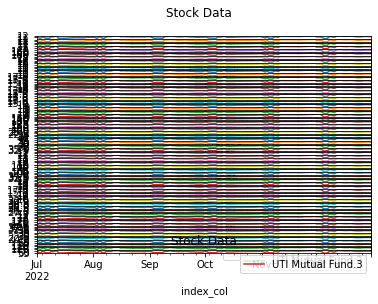

In [34]:
# visualize the stock_data
stocks.plot(subplots=True, title="Stock Data")
plt.title('Stock Data')


# summarize the stock_data
stocks.describe()

,Close
count,124.000000
mean,17592.606452
std,758.510612
min,15752.050000
25%,17227.175000
50%,17657.675000
75%,18157.737500
max,18812.500000


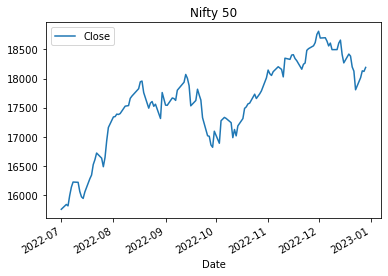

In [35]:
# plot the benchmark_data
bench_mark.plot(title='Nifty 50')


# summarize the benchmark_data
bench_mark.describe()

,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.000758,0.000758,0.000713,0.000714,0.000663,0.000645,0.000663,0.000645,0.000664,0.000664,...,0.000678,0.000654,0.000674,0.000674,0.000655,0.000655,0.000674,0.000674,0.000668,0.000668
std,0.032519,0.032515,0.032242,0.032243,0.032511,0.032433,0.032505,0.032433,0.032373,0.032373,...,0.032500,0.032393,0.032547,0.032547,0.032457,0.032462,0.032615,0.032615,0.032587,0.032587
min,-0.138062,-0.138021,-0.135676,-0.135676,-0.142134,-0.141106,-0.142089,-0.141115,-0.142348,-0.142348,...,-0.142929,-0.141614,-0.138907,-0.138908,-0.137971,-0.137973,-0.142921,-0.142922,-0.142576,-0.142576
25%,-0.004360,-0.004365,-0.004385,-0.004385,-0.004316,-0.004276,-0.004316,-0.004279,-0.004285,-0.004285,...,-0.004282,-0.004292,-0.003830,-0.003830,-0.003842,-0.003842,-0.004315,-0.004315,-0.004318,-0.004318
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005217,0.005212,0.005112,0.005121,0.005250,0.005229,0.005248,0.005227,0.005180,0.005185,...,0.005222,0.005198,0.005235,0.005235,0.005221,0.005220,0.005262,0.005261,0.005254,0.005254
max,0.118488,0.118493,0.116514,0.116515,0.111378,0.111105,0.111380,0.111108,0.109053,0.109053,...,0.111258,0.110909,0.109232,0.109234,0.108552,0.108554,0.111787,0.111787,0.111692,0.111692


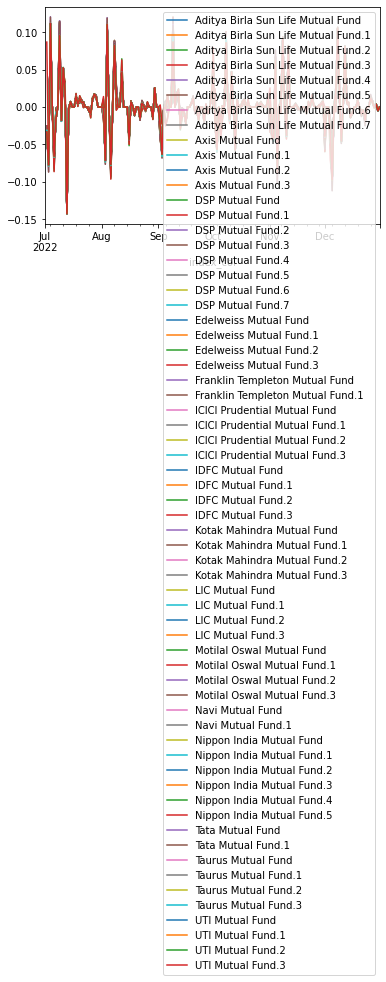

In [36]:
# calculate daily stock_data returns
stock_returns = stocks.pct_change()

# plot the daily returns
stock_returns.plot()


# summarize the daily returns
stock_returns.describe()

In [37]:
stock_returns

,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
index_col,,,,,,,,,,,,,,,,,,,,,
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-02,-0.025360,-0.025359,-0.025887,-0.025878,-0.033338,-0.033612,-0.033337,-0.033608,-0.032688,-0.032688,...,-0.033106,-0.033398,-0.031394,-0.031391,-0.031541,-0.031543,-0.033330,-0.033329,-0.033412,-0.033412
2022-07-03,-0.068252,-0.068249,-0.068721,-0.068730,-0.076979,-0.077184,-0.076972,-0.077186,-0.076517,-0.076517,...,-0.076938,-0.077196,-0.078707,-0.078708,-0.079001,-0.079002,-0.077273,-0.077275,-0.077345,-0.077345
2022-07-04,0.102726,0.102732,0.102091,0.102092,0.111378,0.111105,0.111380,0.111108,0.109053,0.109053,...,0.111258,0.110909,0.109232,0.109234,0.108552,0.108554,0.111787,0.111787,0.111692,0.111692
2022-07-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.008496,0.008497,0.008478,0.008478,0.006518,0.006510,0.006518,0.006515,0.006449,0.006449,...,0.006520,0.006510,0.006239,0.006237,0.006223,0.006225,0.006529,0.006527,0.006525,0.006525
2022-12-28,-0.000171,-0.000179,-0.000189,-0.000189,-0.000554,-0.000561,-0.000555,-0.000564,-0.000574,-0.000574,...,-0.000540,-0.000550,-0.000549,-0.000549,-0.000569,-0.000571,-0.000546,-0.000545,-0.000549,-0.000549
2022-12-29,0.002823,0.002823,0.002800,0.002800,0.003760,0.003752,0.003761,0.003751,0.003766,0.003766,...,0.003763,0.003753,0.003751,0.003751,0.003737,0.003736,0.003764,0.003765,0.003762,0.003762


count    123.000000
mean       0.001205
std        0.008325
min       -0.019385
25%       -0.003806
50%        0.001550
75%        0.006907
max        0.025784
Name: Close, dtype: float64

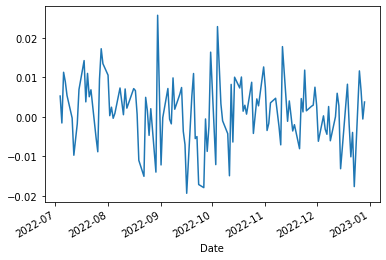

In [38]:
# calculate daily benchmark_data returns

benchmark_returns = bench_mark['Close'].pct_change()

# plot the daily returns
benchmark_returns.plot()


# summarize the daily returns
benchmark_returns.describe()

In [39]:
benchmark_returns

Date
2022-07-01         NaN
2022-07-04    0.005288
2022-07-05   -0.001547
2022-07-06    0.011318
2022-07-07    0.008949
                ...   
2022-12-23   -0.017683
2022-12-26    0.011670
2022-12-27    0.006534
2022-12-28   -0.000540
2022-12-29    0.003780
Name: Close, Length: 124, dtype: float64

,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.000539,0.000539,0.000537,0.000537,0.000908,0.000908,0.000908,0.000908,0.000875,0.000875,...,0.000895,0.000895,0.000902,0.000902,0.000899,0.000897,0.000912,0.000912,0.000912,0.000912
std,0.032093,0.032086,0.031663,0.031664,0.032276,0.032124,0.032268,0.032125,0.032134,0.032134,...,0.032333,0.032131,0.032201,0.032201,0.032024,0.032029,0.032412,0.032412,0.032358,0.032358
min,-0.132354,-0.132314,-0.129969,-0.129969,-0.136427,-0.135399,-0.136381,-0.135407,-0.136640,-0.136640,...,-0.137222,-0.135906,-0.133200,-0.133200,-0.132264,-0.132266,-0.137214,-0.137215,-0.136869,-0.136868
25%,-0.003197,-0.003228,-0.003286,-0.003286,-0.000081,-0.000082,-0.000081,-0.000082,-0.000137,-0.000137,...,-0.000115,-0.000128,-0.000540,-0.000540,-0.000543,-0.000542,-0.000037,-0.000038,-0.000041,-0.000040
50%,0.000051,0.000043,-0.000179,-0.000189,-0.000012,-0.000020,-0.000012,-0.000019,0.000003,-0.000003,...,-0.000008,-0.000021,-0.000042,-0.000041,-0.000052,-0.000052,-0.000007,-0.000006,-0.000010,-0.000009
75%,0.002548,0.002552,0.002540,0.002540,0.000126,0.000174,0.000129,0.000171,0.000132,0.000135,...,0.000162,0.000153,0.000397,0.000396,0.000386,0.000389,0.000129,0.000129,0.000127,0.000126
max,0.116544,0.116549,0.114570,0.114571,0.110391,0.110118,0.110388,0.110118,0.108161,0.108161,...,0.110244,0.109896,0.109134,0.109130,0.108466,0.108465,0.110778,0.110779,0.110684,0.110683


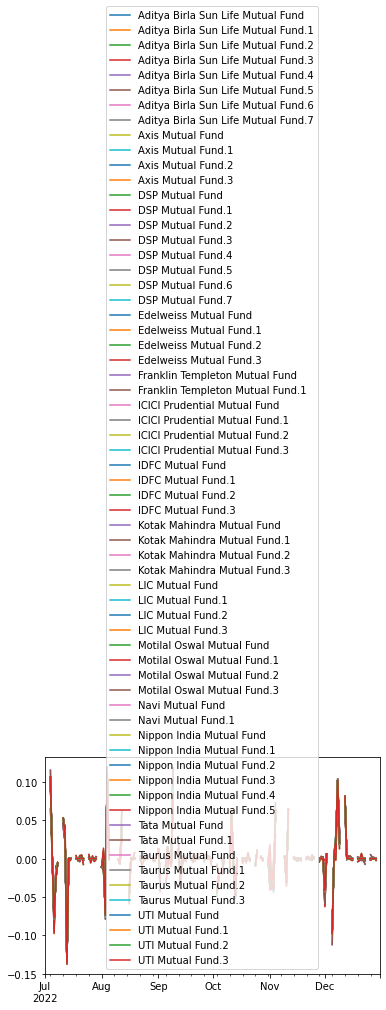

In [40]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(benchmark_returns, axis=0)

# plot the excess_returns
excess_returns.plot()


# summarize the excess_returns
excess_returns.describe()

In [41]:
excess_returns

,Aditya Birla Sun Life Mutual Fund,Aditya Birla Sun Life Mutual Fund.1,Aditya Birla Sun Life Mutual Fund.2,Aditya Birla Sun Life Mutual Fund.3,Aditya Birla Sun Life Mutual Fund.4,Aditya Birla Sun Life Mutual Fund.5,Aditya Birla Sun Life Mutual Fund.6,Aditya Birla Sun Life Mutual Fund.7,Axis Mutual Fund,Axis Mutual Fund.1,...,Tata Mutual Fund,Tata Mutual Fund.1,Taurus Mutual Fund,Taurus Mutual Fund.1,Taurus Mutual Fund.2,Taurus Mutual Fund.3,UTI Mutual Fund,UTI Mutual Fund.1,UTI Mutual Fund.2,UTI Mutual Fund.3
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-04,0.097438,0.097444,0.096803,0.096804,0.106090,0.105817,0.106092,0.105819,0.103765,0.103765,...,1.059702e-01,0.105621,0.103944,0.103946,0.103264,0.103266,0.106498,0.106499,0.106404,0.106403
2022-07-05,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,...,1.547171e-03,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.001963,0.001963,0.001944,0.001944,-0.000015,-0.000023,-0.000016,-0.000019,-0.000085,-0.000085,...,-1.321082e-05,-0.000024,-0.000295,-0.000296,-0.000311,-0.000309,-0.000005,-0.000006,-0.000008,-0.000008
2022-12-28,0.000370,0.000361,0.000351,0.000351,-0.000013,-0.000021,-0.000015,-0.000024,-0.000033,-0.000033,...,6.968232e-07,-0.000009,-0.000009,-0.000008,-0.000029,-0.000031,-0.000006,-0.000005,-0.000009,-0.000008
2022-12-29,-0.000957,-0.000957,-0.000980,-0.000980,-0.000020,-0.000027,-0.000019,-0.000029,-0.000014,-0.000014,...,-1.694860e-05,-0.000027,-0.000029,-0.000029,-0.000043,-0.000043,-0.000016,-0.000015,-0.000018,-0.000018
2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Mean of the Return Difference'}>

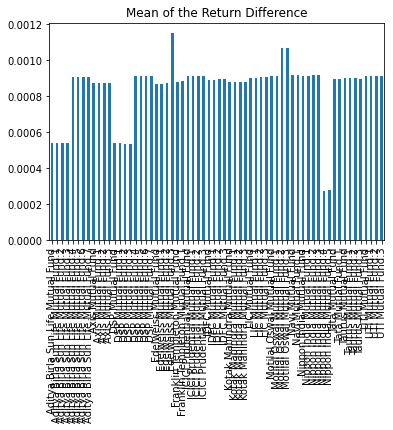

In [42]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference')

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

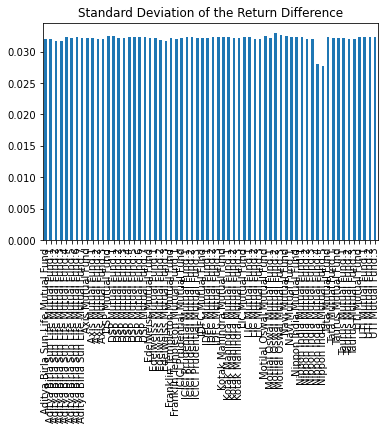

In [43]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs Nifty 50'}>

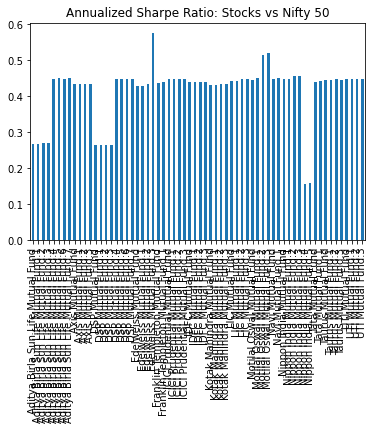

In [44]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs Nifty 50')

In [45]:
annual_sharpe_ratio = pd.DataFrame(annual_sharpe_ratio)

In [46]:
annual_sharpe_ratio=annual_sharpe_ratio.rename(columns={0:'annual_returns'})

In [47]:
annual_sharpe_ratio.sort_values(by='annual_returns',ascending=False).head(3)

,annual_returns
Edelweiss Mutual Fund.3,0.574942
Motilal Oswal Mutual Fund.3,0.518835
Motilal Oswal Mutual Fund.2,0.513028
